## JBL Speaker Reviews Dataset Analysis and Visualization

In this notebook, the reviews from Amazon on JBL Speaker were analyzed and visualized.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Data Preparation and Visualization:


In [2]:
#reading the sqlite file and making a df from the data
con = sqlite3.connect("Amazon.sqlite")
df = pd.read_sql_query("SELECT * from JLB", con)

In [3]:
#Showing the head of the dataset
df.head()

,rating,date,location,color,review_title,review,comment
0,1.0,January-29-2019,United States,Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11
1,3.0,December-12-2018,United States,Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3
2,5.0,October-26-2018,United States,Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1
3,5.0,June-3-2019,United States,Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2
4,4.0,December-5-2018,United States,Red,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,1


In [4]:
df.shape

(1652, 7)

Checking to see if there is any null data in our dataset:

In [5]:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment
1651,5.0,June-4-2019,United States,None,None,None,None


Removing the row with null values:

In [6]:
df.reset_index()
df.dropna()
df.drop_duplicates()
df = df.mask(df.eq('None')).dropna()

In [7]:
#checking again for null values in the dataset
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment


Converting the rating and comment values to numerical:

In [8]:
#converting the data to numerical
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['comment'] = pd.to_numeric(df['comment'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

Adding an extra column for feedback. Here feedback means the review has received one or more comments. Those with comments  (1) and those with no comments (0):

In [9]:
df['feedback'] = np.where(df['comment'] > 0, 1, 0)

Plotting the distribution of the ratings for JBL Speaker in the dataset:

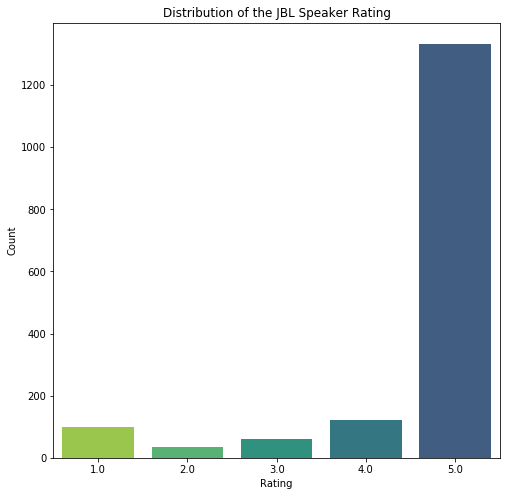

In [13]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['rating'],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Distribution of the JBL Speaker Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.savefig('1.png')

Plotting the feedback verus the number of ratings (What rating and how many of each have the reviews with feedback and without feedback received):

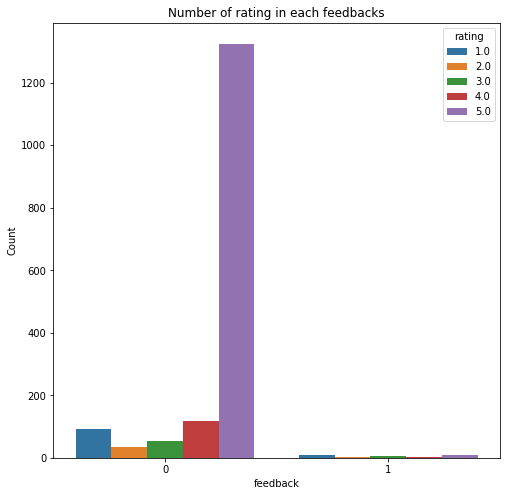

In [14]:
plt.figure(figsize=(8,8))
count = (df.groupby(['feedback']))['rating'].value_counts()\
.reset_index(name = "Count")
sns.barplot(x = "feedback", y = "Count", hue = "rating", data = count)\
.set_title("Number of rating in each feedbacks")
plt.savefig('2.png')

Determining the number of ratings (by star):

In [16]:
df.groupby(['rating'])['rating'].count()

rating
1.0     100
2.0      35
3.0      60
4.0     123
5.0    1333
Name: rating, dtype: int64

Plotting the different ratings (1-5) for different colors of the JBL Speaker:

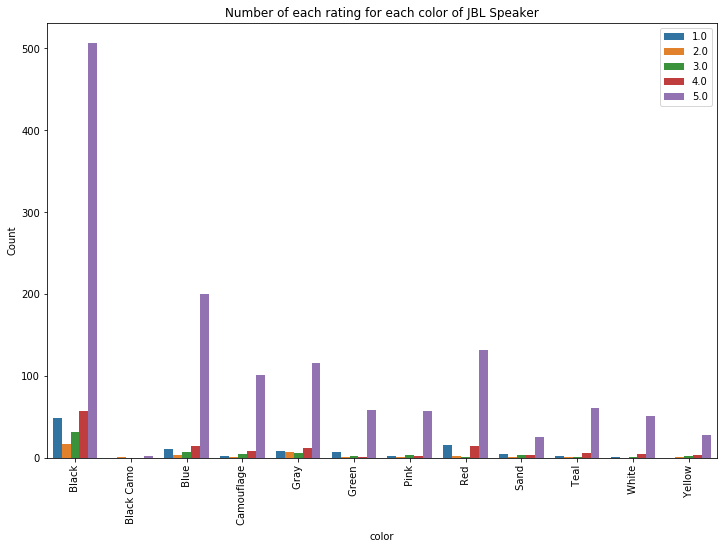

In [43]:
plt.figure(figsize=(12,8))
count = (df.groupby(['color']))['rating'].value_counts()\
.reset_index(name = "Count")
sns.barplot(x = "color", y = "Count", hue = "rating", data = count)\
.set_title("Number of each rating for each color of JBL Speaker")
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.savefig('3.png')
plt.show()

As the majority of ratings are 5, the dataset will be biased towards rating 5. We cn divide our dataset into reviews with rating 5 and the rest. We call the reviews with rating 5 the group "awsome" and the other group "not so awsome". This will reduce the bias to some extent.

In [17]:
df.groupby('rating').count()
df['awesome'] = 0
df.loc[df['rating'] ==5, 'awesome'] = 1

y = df['awesome'].values
df.groupby(['awesome'])['awesome'].count()

awesome
0     318
1    1333
Name: awesome, dtype: int64

Plotting the number of awsome reviews and not so awsome reviews for different colors of the JBL Speaker:

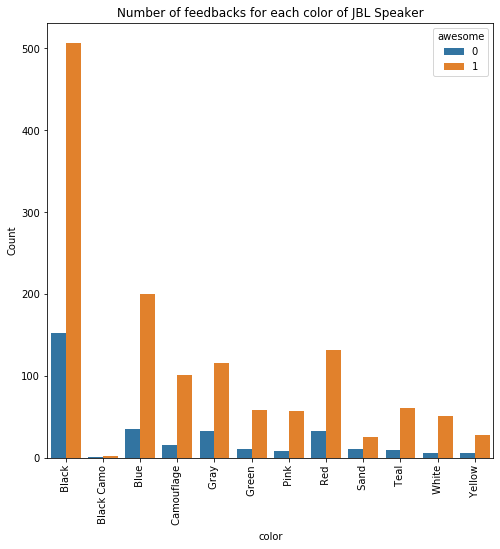

In [26]:
plt.figure(figsize=(8,8))
count = (df.groupby(['color']))['awesome'].value_counts()\
.reset_index(name = "Count")
sns.barplot(x = "color", y = "Count", hue = "awesome", data = count)\
.set_title("Number of feedbacks for each color of JBL Speaker")
plt.xticks(rotation = 90)
plt.savefig('4.png')
plt.show()

Plotting the distribution of difrenet color in JBL speakers reviewed in dataset:

In [44]:
df['color'].nunique()

12

In [45]:
df.isna().sum()

rating          0
date            0
location        0
color           0
review_title    0
review          0
comment         0
feedback        0
awesome         0
dtype: int64

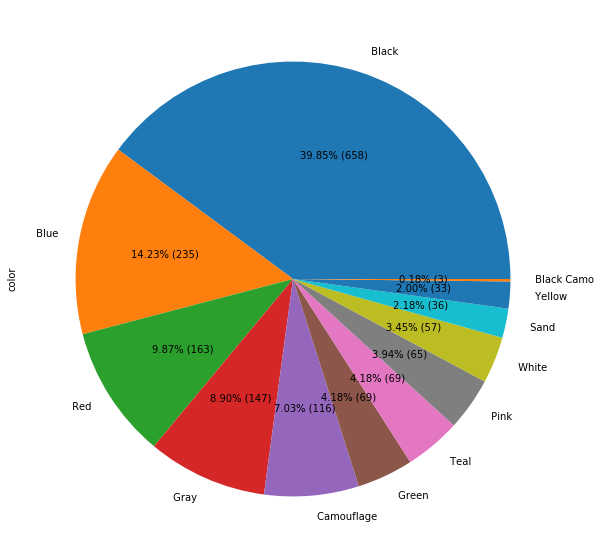

In [48]:
#Plotting the distribution of colors of speaker in the dataset using matplotlip
plt.figure(figsize=(10,10))
total = df['color'].value_counts().sum()
df['color'].value_counts().plot(kind='pie', autopct=lambda p:'{:.2f}% ({:.0f})'.format(p,p * total / 100))

Here we will add a new column as "good" which will correspond to the ratings better than 3 (1). The other group with ratings below 3 (0) will be called "not so good".

In [49]:
df.groupby('rating').count()
df['good'] = 0
df.loc[df['rating'] >=3, 'good'] = 1

y = df['good'].values
df.groupby(['good'])['good'].count()

good
0     135
1    1516
Name: good, dtype: int64